# Análisis y detección de clústeres por K-Means

El algoritmo de las K-Medias se basa en encontrar k-centroides, es decir, k-puntos espaciales, dónde la k representa el número de categorías desconocidas con las que nos gustaría etiquetar nuestros datos.

Por ejemplo, si tenemos 4 variables que representan los esfuerzos en un proyecto (ESFUERZO_TOTAL_P, ESFUERZO_TOTAL_R, ESFUERZO_TOTAL_E, ESFUERZO_TOTAL_V), entonces nos gustaría encontrar 5 categorías distintas que expresen a estas 4 variables, es decir, dadas 4 variables, yo quiero encontrar para esas 4 variables a qué etiqueta pertenecen.

El algoritmo consta de dos fases:

* Etiquetado: Se busca el centroide más cercano a cada punto y se le asigna esa etiqueta
* Actualización: Se calcula el centro de masa (centroide) de todos los elementos con la misma etiqueta

In [1]:
import numpy as np

X = np.array([
    (1, 0.11),
    (13, 0.56),
    (24, 0.76),
    (12, 0.81),
    (15, 0.17),
    (46, 0.14),
    (80, 0.5),
    (2, 0.91),
    (24, 1.4),
])

X

array([[ 1.  ,  0.11],
       [13.  ,  0.56],
       [24.  ,  0.76],
       [12.  ,  0.81],
       [15.  ,  0.17],
       [46.  ,  0.14],
       [80.  ,  0.5 ],
       [ 2.  ,  0.91],
       [24.  ,  1.4 ]])

In [2]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)

cluster.fit(X)

cluster.labels_

D:\conda\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 2, 2, 0, 1, 2, 0])

In [5]:
y = cluster.predict(X)

y

array([2, 2, 0, 2, 2, 0, 1, 2, 0])

<Axes: >

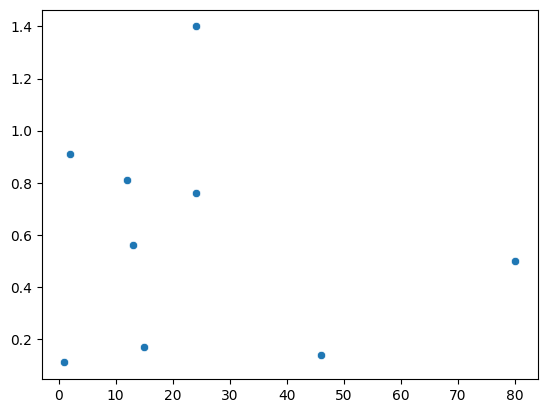

In [6]:
import seaborn as sns

sns.scatterplot(x=X[:,0], y=X[:,1])

<Axes: >

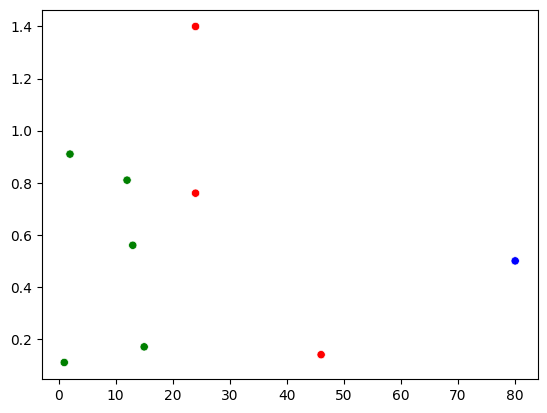

In [8]:
colors = list(map(lambda yi: ({0: "red", 1: "blue", 2: "green"})[yi], y))

sns.scatterplot(x=X[:,0], y=X[:,1], color=colors)

## Caso de estudio

In [9]:
import pandas as pd

proyectos = pd.read_excel("data/ProyectosFinalizados.xlsx", sheet_name="base")

def limpiar_columna(columna):
    # 1. Reemplazar caracteres especiales
    columna = columna.replace(" ", "_") \
        .replace("á", "a") \
        .replace("é", "e") \
        .replace("í", "i") \
        .replace("ó", "o") \
        .replace("ú", "u") \
        .replace("ñ", "n") \
        .replace("+", "_") \
        .replace(".", "_") \
        .replace("(", "_") \
        .replace(")", "")
    import re
    # 2. Poner un guion bajo entre cambio de letras de minúscula a mayúsculas
    columna = re.sub("([a-z])([A-Z])", "\\1_\\2", columna)
    # 3. Poner un guion bajo entre ID y letra
    columna = re.sub("ID([A-Za-z])", "ID_\\1", columna)
    # 4. Poner un guion bajo entre número y letra
    columna = re.sub("([0-9])([A-Za-z])", "\\1_\\2", columna)
    # 4. Poner un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])([0-9])", "\\1_\\2", columna)
    # 5. Quitar un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])_([0-9])", "\\1\\2", columna)
    # 6. Poner un guion bajo entre letra y número final
    columna = re.sub("([A-Za-z])([0-9])$", "\\1_\\2", columna)
    # 7. Convertir a mayúsculas
    columna = columna.upper()
    return columna

proyectos.columns = map(limpiar_columna, proyectos.columns.values)

proyectos.head()

,ID_PROYECTO,EMPRESA,PETICION,PETICION_1,PET_EMPRESA,NOMBRE,CFP,EFICIENCIA,PDR,ESFUERZO_TOTAL_P,...,PDR_S,PDR_M_1,PDR_M_2,PDR_L,LEAD_TIME,F1_GESTIONDELA_DEMANDA,F2_ELICITACION,F3_CONTRUCCION,F4_FINAL,TAMANO
0,1,México,8318.0,8318,8318México,Modificación a la utileria de generación de pa...,12,NaN,33.708333,404.5,...,NaN,NaN,NaN,NaN,914.0,825.0,8.0,42.0,35.0,10-29
1,2,México,9619.0,9619,9619México,Modificacion al programa Vbncarga.exe,2,NaN,147.500000,295.0,...,NaN,NaN,NaN,NaN,609.0,584.0,7.0,14.0,1.0,2-9
2,3,México,10438.0,10438,10438México,Permisos para Cambios de puntos de Sembrado- P...,11,NaN,51.375455,1019.0,...,NaN,NaN,NaN,NaN,519.0,461.0,2.0,37.0,1.0,10-29
3,4,México,10522.0,10522,10522México,Corrección del informe TabuladoCredito,11,NaN,47.727273,525.0,...,NaN,NaN,NaN,NaN,493.0,455.0,9.0,27.0,1.0,10-29
4,5,México,10528.0,10528,10528México,Corrección al Tabulado de Carteras y Hojas men...,4,NaN,26.290000,213.0,...,NaN,NaN,NaN,NaN,557.0,520.0,5.0,30.0,0.0,2-9


In [10]:
X = proyectos[["ESFUERZO_TOTAL_P", "ESFUERZO_TOTAL_R", "ESFUERZO_TOTAL_E", "ESFUERZO_TOTAL_V"]]

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X)

X_transform = pca.transform(X)

X_transform[:5]

array([[-1231.3557328 ,    74.86302181],
       [-1493.6493469 ,   117.60901475],
       [ -667.33899848,   -26.98857794],
       [-1125.08379481,   -38.83559886],
       [-1704.93718224,   255.83342165]])

<Axes: >

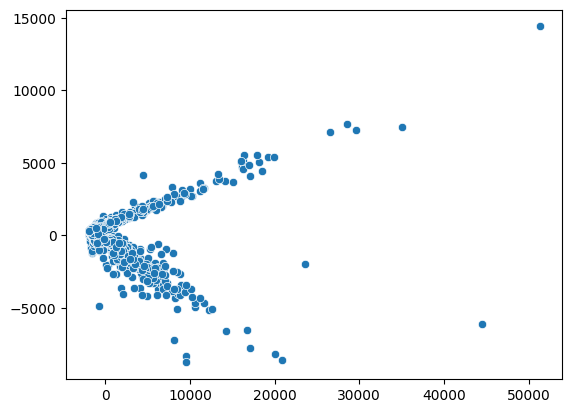

In [12]:
sns.scatterplot(x=X_transform[:,0], y=X_transform[:,1])

In [19]:
cluster = KMeans(n_clusters=2, algorithm="auto")

cluster.fit(X_transform)

y = cluster.predict(X_transform)

y[:5]

D:\conda\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\conda\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


array([0, 0, 0, 0, 0])

<Axes: >

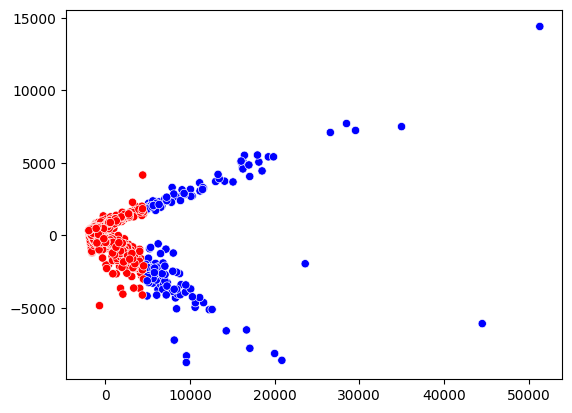

In [18]:
colors = list(map(lambda yi: ({0: "red", 1: "blue", 2: "green"})[yi], y))

sns.scatterplot(x=X_transform[:,0], y=X_transform[:,1], color=colors)